# 🔥🌲 Forest Fire Weather Index (FWI) 

## 🌟 What is FWI (Fire Weather Index)?
The **Fire Weather Index (FWI)** is a numerical indicator used to estimate the likelihood and potential intensity of forest fires.  
It is part of the **Canadian Forest Fire Weather Index System (CFFWIS)** and is widely used in fire management and research.

**💧 RH – Relative Humidity**  
Amount of moisture present in the air (%).

**💨 Ws – Wind Speed**  
Speed of the wind (usually in km/h or m/s).

**🌧️ Rain – Rainfall**  
Amount of precipitation (mm).

**🔥 FFMC – Fine Fuel Moisture Code**  
Represents moisture content of fast-drying surface fuels (like grass, pine needles).

**🌿 DMC – Duff Moisture Code**  
Indicates moisture level in the upper layer of compact organic material (duff).

**🌵 DC – Drought Code**  
Reflects deep soil moisture; describes long-term drought.

**⚡ ISI – Initial Spread Index**  
Shows how fast a fire would start spreading.

**🛢️ BUI – Build Up Index**  
Represents the amount of available fuel based on deeper moisture codes.

**🔥🔥 FWI – Fire Weather Index**  
The final fire intensity score combining ISI and BUI.


---


<div align="center">

# **Task 1️⃣**

</div>


___


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('merged_data.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [3]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        2
dtype: int64

In [5]:
df['Classes  '].value_counts()

Classes  
fire             209
not fire         142
fire               4
not fire           2
not fire           2
fire               2
not fire           2
not fire           1
Name: count, dtype: int64

In [6]:
# 1. Strip whitespace from column name
df.columns = df.columns.str.strip()

# 2. Clean the "Classes" column values
df["Classes"] = (
    df["Classes"]
    .astype(str)
    .str.strip()           # remove spaces
    .str.lower()           # make lowercase
    .replace({
        "fire": "fire",
        "not fire": "not fire"
    })
)

# 3. Verify results
print(df["Classes"].value_counts())


Classes
fire        215
not fire    149
nan           2
Name: count, dtype: int64


In [7]:
# Drop rows where the value is literally the string "nan"
df = df[df["Classes"] != "nan"].reset_index(drop=True)

# Check again
print(df["Classes"].value_counts())


Classes
fire        215
not fire    149
Name: count, dtype: int64


In [8]:
df['Classes'] = df['Classes'].map({'fire':1, 'not fire':0})

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


# 📊 Histograms are for:

- 🔢 **Showing how numbers are distributed**  
  See where values cluster or spread out.

- ⚖️ **Checking for class imbalance**  
  Identify if some categories/classes dominate the data.


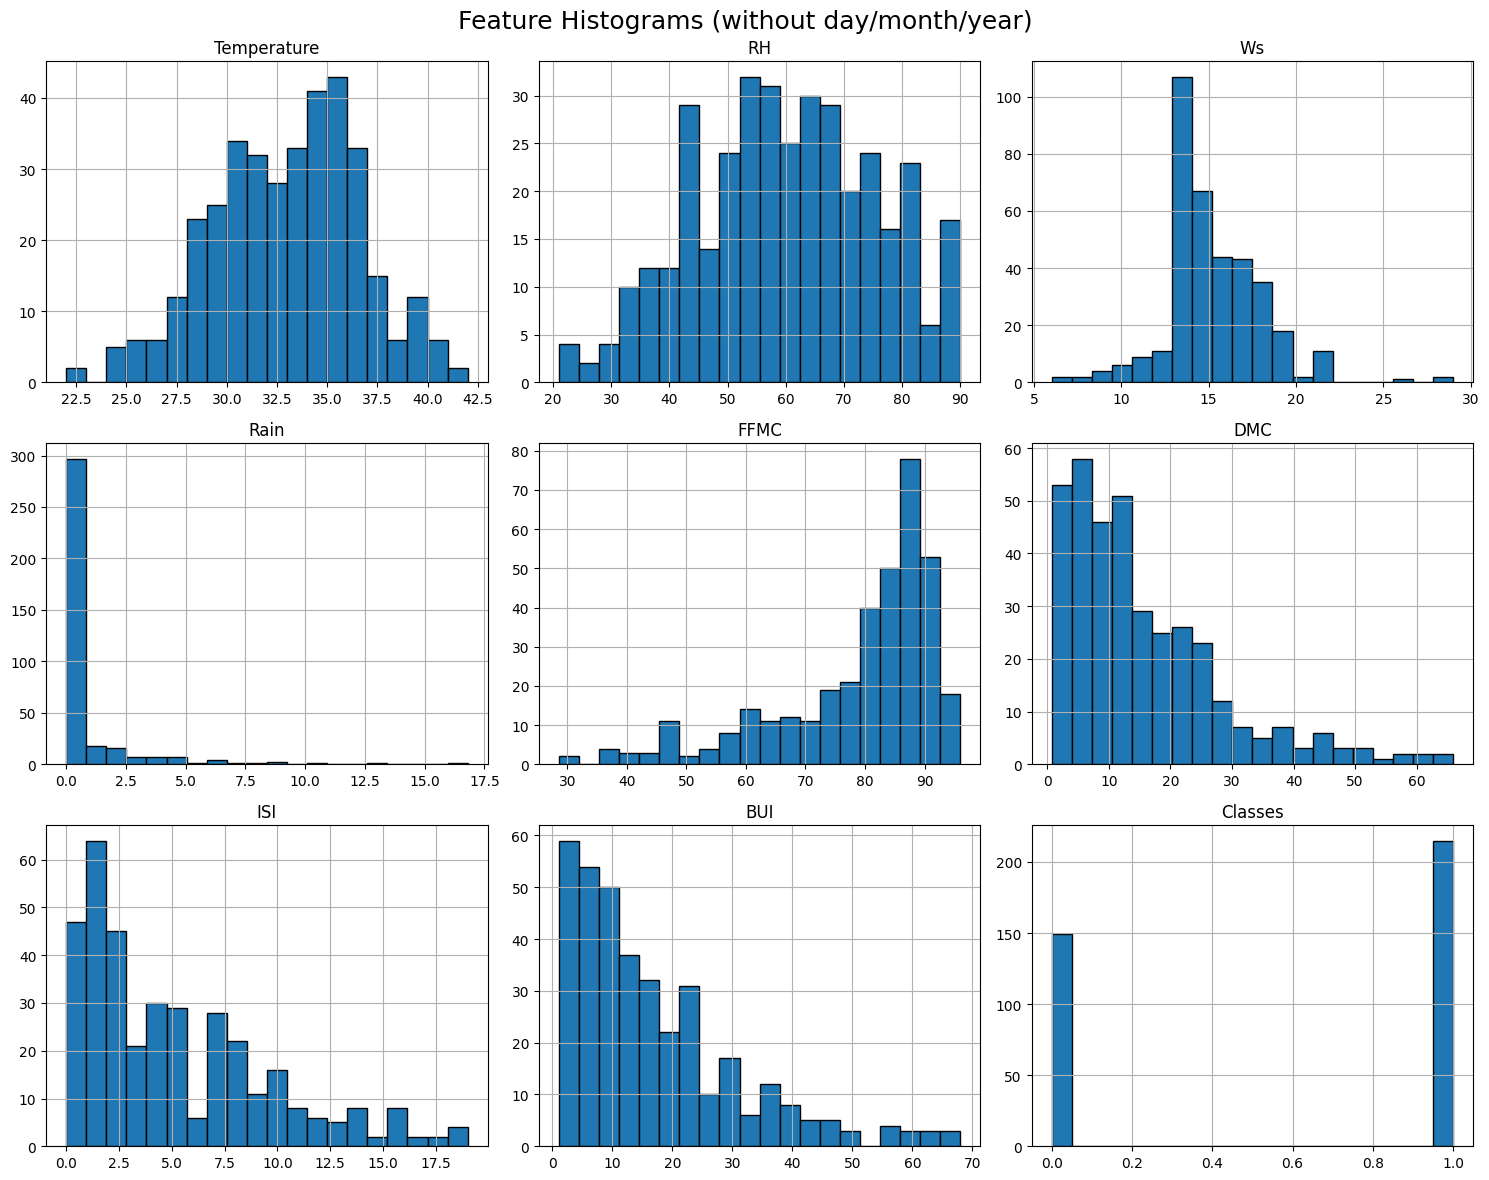

In [10]:
cols_to_drop = ["day", "month", "year"]

df2 = df.drop(columns=cols_to_drop)   

df2.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Feature Histograms (without day/month/year)", fontsize=18)
plt.tight_layout()
plt.show()

In [11]:
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')
df['DC'] = pd.to_numeric(df['DC'], errors='coerce')

# 🔗 Correlation

- 📈 **Shows the relationship between two variables**  
  Understand if they move **together** or **opposite**.

- 🤝 **Positive correlation**  
  When one variable increases, the other tends to increase too.

- 🔄 **Negative correlation**  
  When one variable increases, the other tends to decrease.

- ❌ **No correlation**  
  No clear pattern between the variables.

- ✏️ **Pearson Correlation Coefficient:**  
$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \;
\sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

- 💡 **Use cases**  
  Helps identify important features, detect multicollinearity, and guide predictions.


In [12]:
df_corr = df.drop(columns=['year'], errors='ignore')

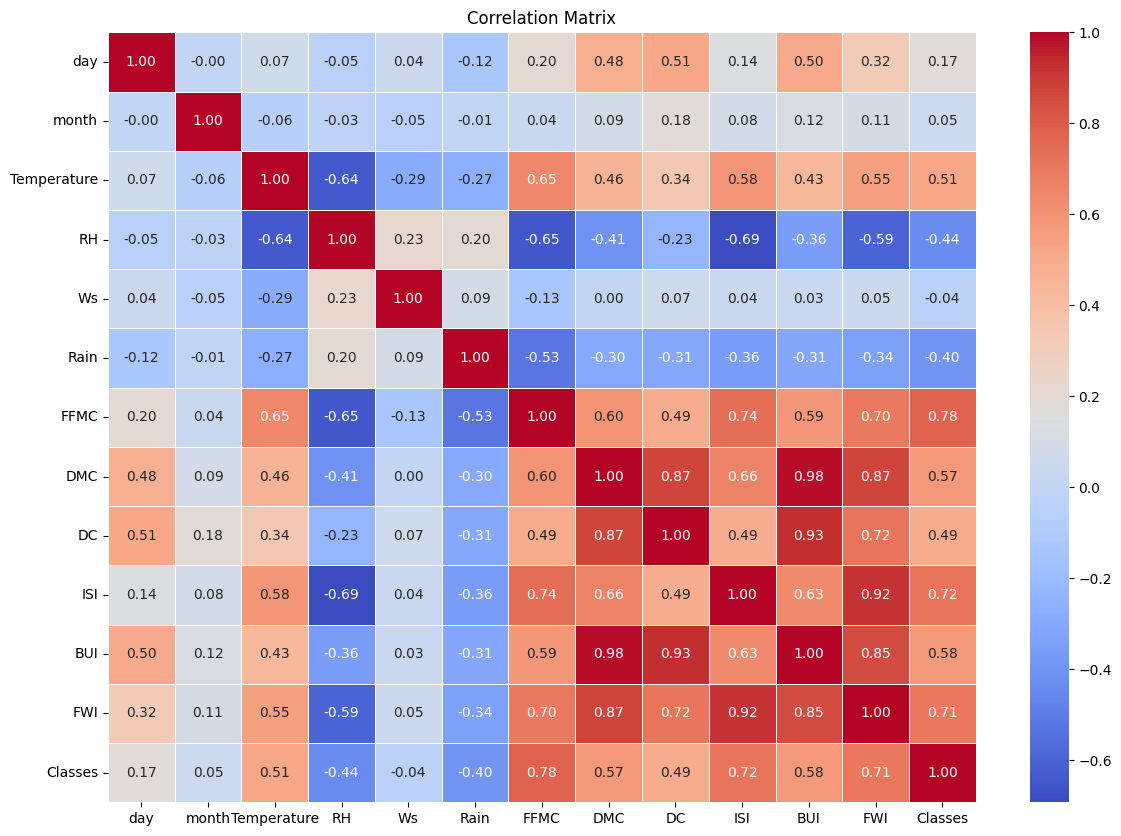

In [13]:
plt.figure(figsize=(14, 10))
corr = df_corr.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Max FWI for NOT FIRE (class 0)
max_not_fire = df[df['Classes'] == 0]['FWI'].max()

# Min FWI for FIRE (class 1)
min_fire = df[df['Classes'] == 1]['FWI'].min()

print("Max FWI for class 0 (not fire):", max_not_fire)
print("Min FWI for class 1 (fire):", min_fire)

Max FWI for class 0 (not fire): 6.1
Min FWI for class 1 (fire): 1.7


In [14]:
df.to_csv("output.csv", index=False)
print("DataFrame saved as output.csv")

DataFrame saved as output.csv


# 📦 Box Plot & Outliers

- 📊 **Box Plot**  
  Visualizes the **distribution** of data, showing median, quartiles, and spread.

- ➖ **Median (Q2)** – The middle value of the dataset.  
- 📦 **Q1 & Q3** – 1st and 3rd quartiles (25th & 75th percentiles).  

- 📏 **IQR (Interquartile Range)**  
$$
\text{IQR} = Q3 - Q1
$$

- 🚨 **Outliers**  
  Data points that lie far from the bulk of values.  
  Typically defined using the **1.5 × IQR rule**:

$$
\text{Lower Fence} = Q1 - 1.5 \times \text{IQR}
$$

$$
\text{Upper Fence} = Q3 + 1.5 \times \text{IQR}
$$

  Values outside these fences are considered **outliers**.  

- 💡 **Why it matters**  
  Helps spot anomalies, errors, or extreme values that can affect analysis.


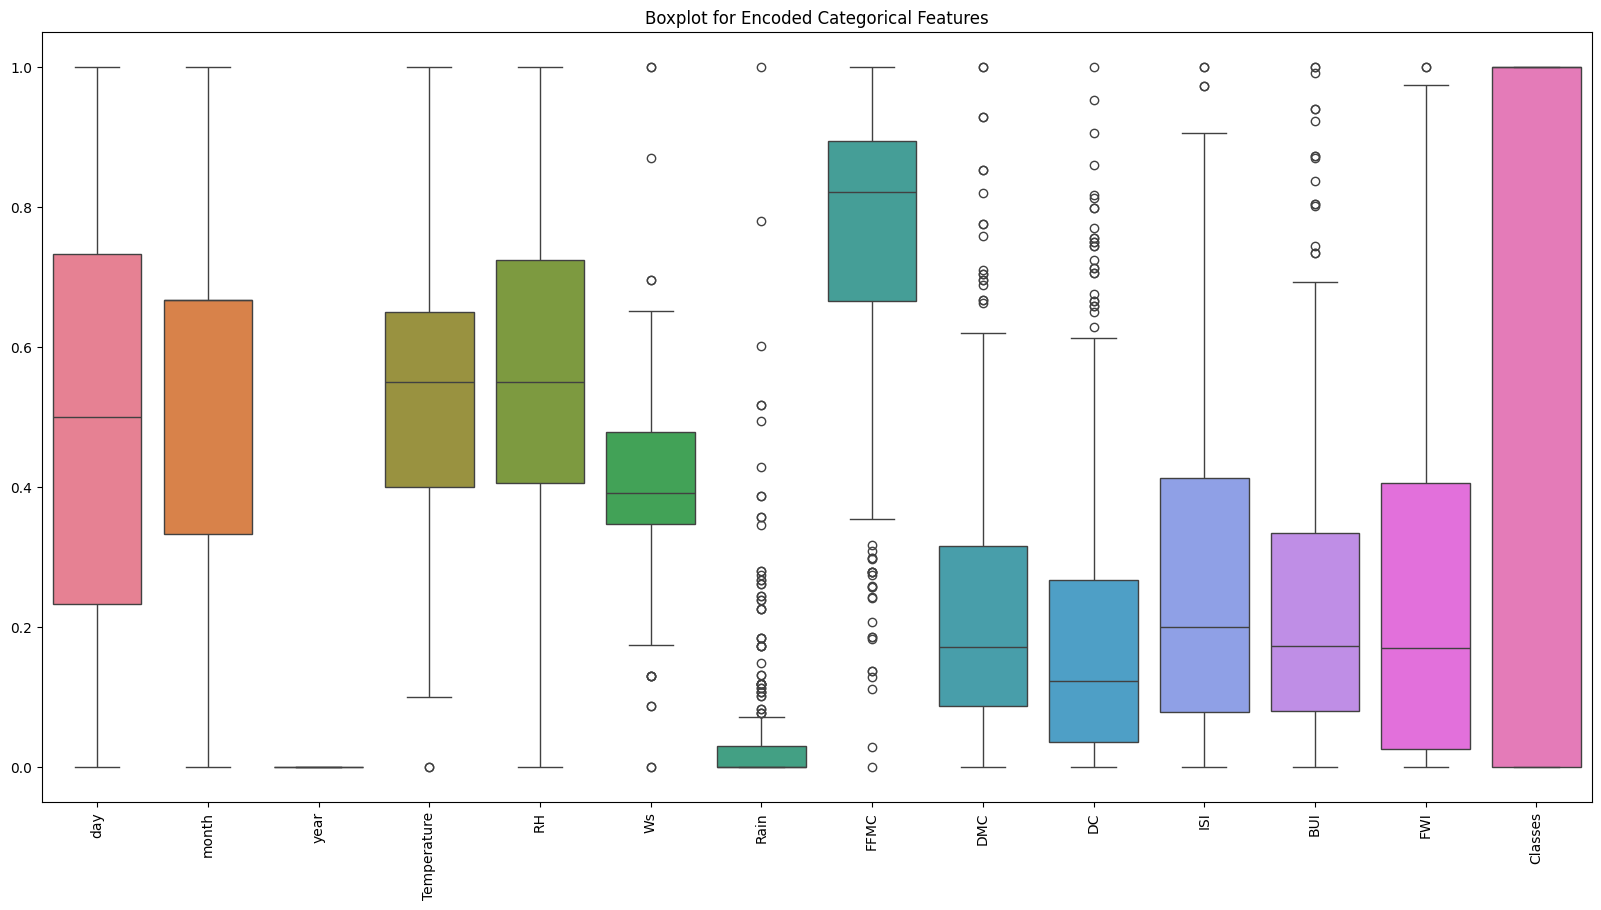

Temperature: 2 outliers
Ws: 13 outliers
Rain: 54 outliers
FFMC: 25 outliers
DMC: 19 outliers
DC: 27 outliers
ISI: 4 outliers
BUI: 16 outliers
FWI: 2 outliers


In [16]:
# Detecting "outliers" in the encoded data using boxplots
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title('Boxplot for Encoded Categorical Features')
plt.xticks(rotation=90)
plt.show()

# Analyze Boxplot for Outliers
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not outliers.empty:
        print(f'{column}: {len(outliers)} outliers')
# Detect and handle outliers
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the medianv 
    df[column] = df[column].where(
        (df[column] >= lower_bound) & (df[column] <= upper_bound),
        df[column].mean()
    )


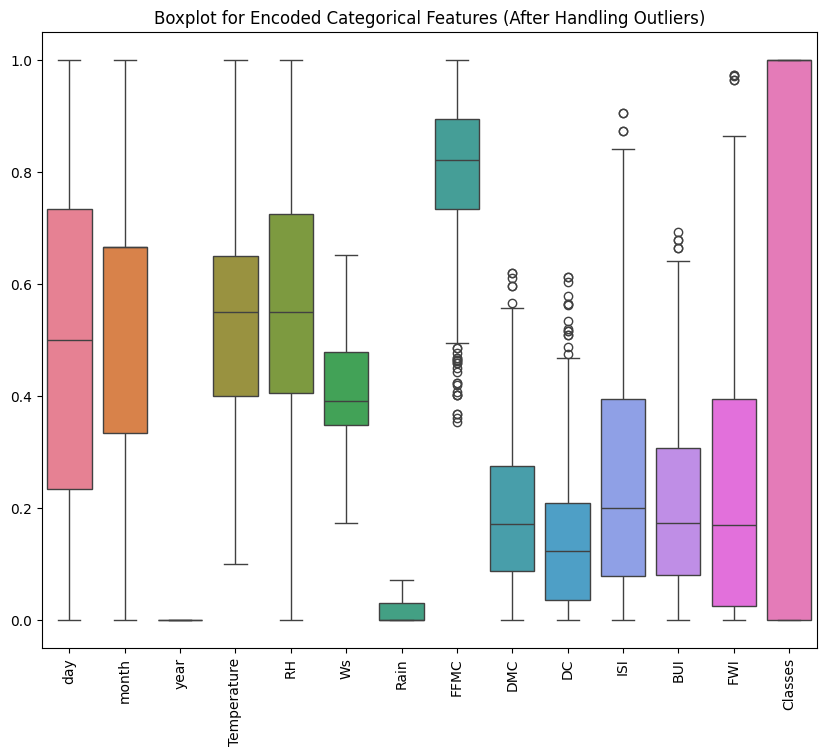

day: 0 outliers
month: 0 outliers
year: 0 outliers
Temperature: 0 outliers
RH: 0 outliers
Ws: 0 outliers
Rain: 0 outliers
FFMC: 23 outliers
DMC: 6 outliers
DC: 15 outliers
ISI: 4 outliers
BUI: 5 outliers
FWI: 5 outliers
Classes: 0 outliers


In [17]:
# Visualize to check for remaining outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title('Boxplot for Encoded Categorical Features (After Handling Outliers)')
plt.xticks(rotation=90)
plt.show()

# Check for remaining outliers
# Count remaining outliers (IQR method)
for column in df.columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f'{column}: {len(outliers)} outliers')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          364 non-null    float64
 1   month        364 non-null    float64
 2   year         364 non-null    float64
 3   Temperature  364 non-null    float64
 4   RH           364 non-null    float64
 5   Ws           364 non-null    float64
 6   Rain         364 non-null    float64
 7   FFMC         364 non-null    float64
 8   DMC          364 non-null    float64
 9   DC           364 non-null    float64
 10  ISI          364 non-null    float64
 11  BUI          364 non-null    float64
 12  FWI          364 non-null    float64
 13  Classes      364 non-null    float64
dtypes: float64(14)
memory usage: 39.9 KB


In [20]:
print(df.shape)

(364, 14)


---

<div align="center">

# **Task 2️⃣**

</div>


---


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('output.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [3]:
df = df.drop(columns=["day", "month", "year"])
# Show the cleaned dataset
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [4]:
#Independent and dependent features
X = df.drop('FWI',axis =1)
y= df['FWI']

In [5]:
#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state = 10)

In [6]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.653364,-0.259057,-0.242857,0.625847,0.430020,0.321778,0.567475,0.406981,0.503638
RH,-0.653364,1.000000,0.191811,0.189569,-0.650517,-0.402986,-0.242051,-0.699136,-0.361449,-0.445854
Ws,-0.259057,0.191811,1.000000,0.077428,-0.088834,0.051279,0.111369,0.090542,0.077437,0.005098
Rain,-0.242857,0.189569,0.077428,1.000000,-0.513633,-0.293607,-0.300608,-0.353032,-0.305399,-0.398053
FFMC,0.625847,-0.650517,-0.088834,-0.513633,1.000000,0.591319,0.495265,0.742653,0.583708,0.787327
DMC,0.430020,-0.402986,0.051279,-0.293607,0.591319,1.000000,0.862928,0.669196,0.982746,0.560866
DC,0.321778,-0.242051,0.111369,-0.300608,0.495265,0.862928,1.000000,0.504811,0.933476,0.494410
ISI,0.567475,-0.699136,0.090542,-0.353032,0.742653,0.669196,0.504811,1.000000,0.640466,0.714284
BUI,0.406981,-0.361449,0.077437,-0.305399,0.583708,0.982746,0.933476,0.640466,1.000000,0.566870
Classes,0.503638,-0.445854,0.005098,-0.398053,0.787327,0.560866,0.494410,0.714284,0.566870,1.000000


In [7]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [8]:
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [9]:
X_train.drop(corr_features, axis = 1, inplace=True)
X_test.drop(corr_features, axis = 1, inplace=True)

# ⚖️ Feature Scaling – StandardScaler

- 📏 **Purpose:**  
  Scale features so they have **mean = 0** and **standard deviation = 1**.  
  Makes all features comparable for models like **SVM, KNN, and regression**.

- 🔹 **How it works:**  
  StandardScaler transforms each value as:  
$$
z = \frac{x - \mu}{\sigma}
$$

Where:  
- 🧮 $x$ = original value  
- 📊 $\mu$ = mean of the feature  
- 📐 $\sigma$ = standard deviation of the feature

- ⚡ **Benefits:**  
  - Prevents features with large ranges from dominating the model  
  - Improves model convergence speed  
  - Helps algorithms that rely on distance metrics

- 💡 **Quick tip:**  
  Always fit the scaler on **training data** and transform **both train and test** data to avoid data leakage.


In [7]:
scaler = StandardScaler()

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📉 Linear Regression

- 🎯 **Goal:** Predict a continuous target using input features.  

- ✏️ **Equation:**  
$$
y = b_0 + b_1 x_1 + b_2 x_2 + \dots + b_n x_n
$$

Where:  
- 🧮 $b_0$ = intercept  
- 📊 $b_i$ = coefficient for feature $x_i$

- ⚡ **Key idea:** Fit a line (or hyperplane) that **minimizes the difference** between predicted & actual values.  
- 💡 **Use cases:** Sales prediction, house prices, trend forecasting.



In [9]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred = linreg.predict(X_test_scaled)

In [11]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

0.7252875191645507

In [12]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.945852512274522


In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Training predictions
y_train_pred = linreg.predict(X_train_scaled)

# Testing predictions
y_test_pred = linreg.predict(X_test_scaled)

# R² scores (accuracy for regression)
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy  = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train Accuracy (R²):", train_accuracy)
print("Test Accuracy (R²):", test_accuracy)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train Accuracy (R²): 0.9799434804718238
Test Accuracy (R²): 0.945852512274522
Train RMSE: 1.1225834494646196
Test RMSE: 1.594968883210037


In [14]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)
import numpy as np

# Predictions already done:
# y_pred = linreg.predict(X_test_scaled)

# ---- Metrics ----
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("----- Linear Regression Metrics -----")
print(f"MAE  : {mae}")
print(f"MSE  : {mse}")
print(f"RMSE : {rmse}")
print(f"R²   : {r2}")


# Optional: Explained Variance Score
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {evs}")


----- Linear Regression Metrics -----
MAE  : 0.7252875191645507
MSE  : 2.5439257384082725
RMSE : 1.594968883210037
R²   : 0.945852512274522
Explained Variance Score: 0.9465001385391492


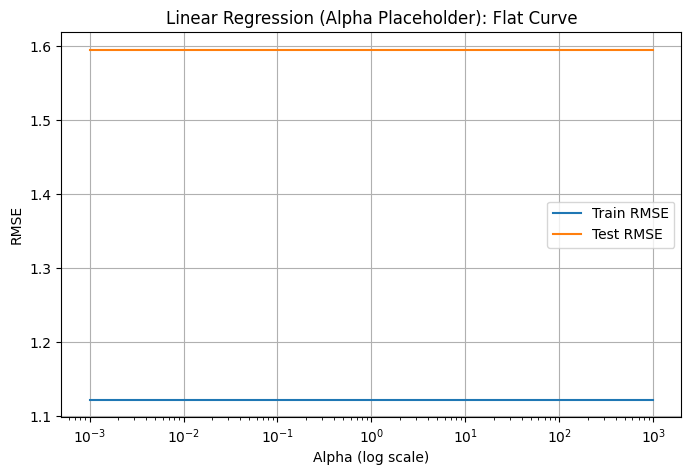

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fake alpha values (linear regression ignores them)
alphas = np.logspace(-3, 3, 50)

train_errors = []
test_errors = []

for a in alphas:
    # Linear Regression has no alpha – same model every time
    linreg = LinearRegression()
    linreg.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = linreg.predict(X_train_scaled)
    y_test_pred = linreg.predict(X_test_scaled)
    
    # RMSE
    train_errors.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# ----- Plot -----
plt.figure(figsize=(8, 5))
plt.plot(alphas, train_errors, label="Train RMSE")
plt.plot(alphas, test_errors, label="Test RMSE")

plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("Linear Regression (Alpha Placeholder): Flat Curve")
plt.legend()
plt.grid(True)
plt.show()


# 🧮 RSS – Residual Sum of Squares

- 🎯 **Goal:** Measure how far predictions are from actual values.  

- ✏️ **Equation:**  
$$
\text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:  
- 📊 $y_i$ = actual value  
- 🖊️ $\hat{y}_i$ = predicted value  

- ⚡ **Key idea – Minimize RSS:**  
  - The model tries to **find coefficients** that make predictions as close as possible to actual values.  
  - Smaller RSS → better fit → predictions closer to true values  

- 💡 **Analogy:**  
  Like throwing darts at a target 🎯 — minimizing RSS is trying to **hit the bullseye as often as possible**.


# 🪢 Lasso Regression

- 🎯 **Goal:** Linear regression + feature selection  

- ✏️ **Equation:**  
$$
\text{Minimize } \text{RSS} + \alpha \sum_{i=1}^{n} |b_i|
$$

Where:  
- 🧮 $b_i$ = coefficients  
- 🔒 $\alpha$ = regularization strength

- ⚡ **Key idea:**  
  Shrinks some coefficients to **zero**, effectively removing less important features.  

- 💡 **Use cases:** High-dimensional data, feature selection, preventing overfitting.


🔥 Lasso Regression Best Model Metrics 🔥
Best alpha: 0.09103
Train R²: 0.9782 | Test R²: 0.9470
Train RMSE: 1.1701 | Test RMSE: 1.5785
Train MSE: 1.3692 | Test MSE: 2.4917
Train MAE: 0.6717 | Test MAE: 0.7412
Explained Variance Score: 0.9480


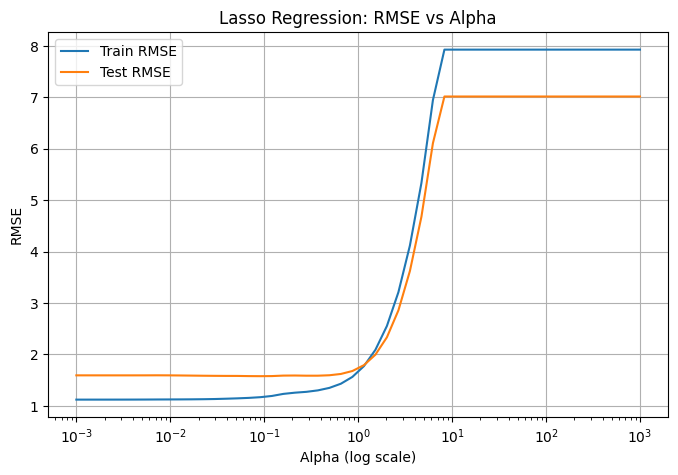

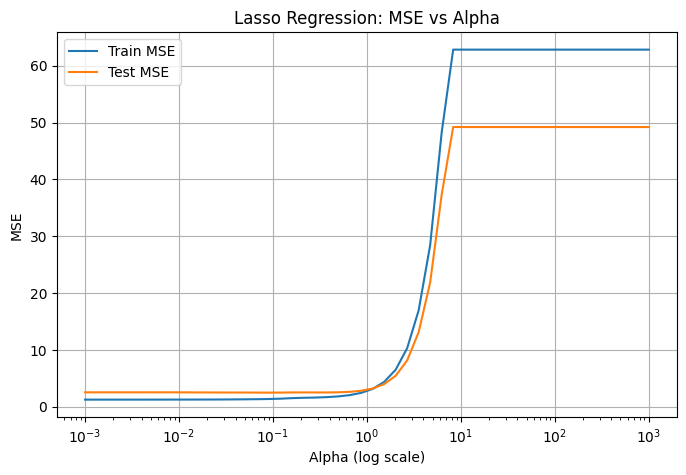

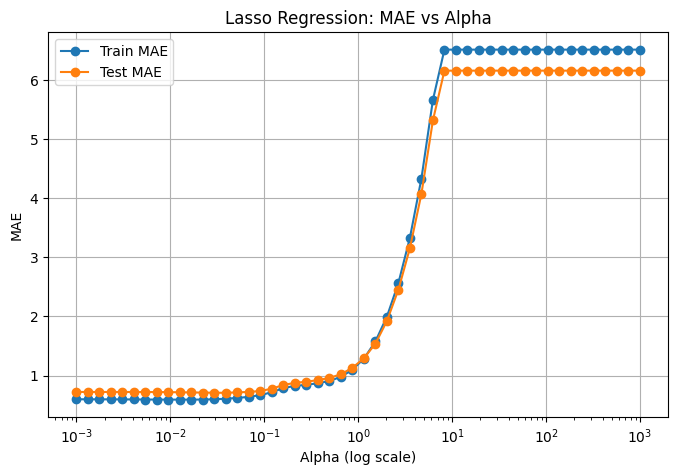

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
    explained_variance_score
)

# ---------------------------
# Range of alpha values
# ---------------------------
alphas = np.logspace(-3, 3, 50)

# Store metrics for visualization
train_rmse, test_rmse = [], []
train_mse, test_mse = [], []
train_mae, test_mae = [], []

# ---------------------------
# Train models across alphas
# ---------------------------
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = lasso.predict(X_train_scaled)
    y_test_pred  = lasso.predict(X_test_scaled)
    
    # RMSE
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    # MSE
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    
    # MAE
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

# ---------------------------
# Pick best alpha (min test RMSE)
# ---------------------------
best_alpha_index = np.argmin(test_rmse)
best_alpha = alphas[best_alpha_index]

# Train final model with best alpha
lasso_best = Lasso(alpha=best_alpha, max_iter=5000)
lasso_best.fit(X_train_scaled, y_train)
y_train_pred = lasso_best.predict(X_train_scaled)
y_test_pred  = lasso_best.predict(X_test_scaled)

# ---------------------------
# Metrics for best alpha
# ---------------------------
train_r2 = r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)
train_rmse_final = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_final  = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mse_final = mean_squared_error(y_train, y_train_pred)
test_mse_final  = mean_squared_error(y_test, y_test_pred)
train_mae_final = mean_absolute_error(y_train, y_train_pred)
test_mae_final  = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_evs  = explained_variance_score(y_test, y_test_pred)

# ---------------------------
# Print Results
# ---------------------------
print("🔥 Lasso Regression Best Model Metrics 🔥")
print(f"Best alpha: {best_alpha:.5f}")
print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse_final:.4f} | Test RMSE: {test_rmse_final:.4f}")
print(f"Train MSE: {train_mse_final:.4f} | Test MSE: {test_mse_final:.4f}")
print(f"Train MAE: {train_mae_final:.4f} | Test MAE: {test_mae_final:.4f}")
print(f"Explained Variance Score: {test_evs:.4f}")

# ---------------------------
# Visualizations
# ---------------------------

# 1️⃣ RMSE vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_rmse, label="Train RMSE")
plt.plot(alphas, test_rmse, label="Test RMSE")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("Lasso Regression: RMSE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

# 2️⃣ MSE vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_mse, label="Train MSE")
plt.plot(alphas, test_mse, label="Test MSE")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("MSE")
plt.title("Lasso Regression: MSE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

# 3️⃣ MAE vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_mae, label="Train MAE", marker='o')
plt.plot(alphas, test_mae, label="Test MAE", marker='o')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("MAE")
plt.title("Lasso Regression: MAE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()


# 🏔️ Ridge Regression

- 🎯 **Goal:** Linear regression + L2 regularization  

- ✏️ **Equation:**  
$$
\text{Minimize } \text{RSS} + \alpha \sum_{i=1}^{n} b_i^2
$$

Where:  
- 🧮 $b_i$ = coefficients  
- 🔒 $\alpha$ = regularization strength

- ⚡ **Key idea:**  
  Shrinks coefficients **toward zero** but never exactly zero, reducing overfitting.  

- 💡 **Use cases:** High-dimensional data, multicollinearity, preventing overfitting.


🔥 Ridge Regression Best Model Metrics 🔥
Best alpha: 8.28643
Train R²: 0.9782 | Test R²: 0.9459
Train RMSE: 1.1695 | Test RMSE: 1.5942
Train MSE: 1.3676 | Test MSE: 2.5415
Train MAE: 0.6864 | Test MAE: 0.8055
Explained Variance Score: 0.9470


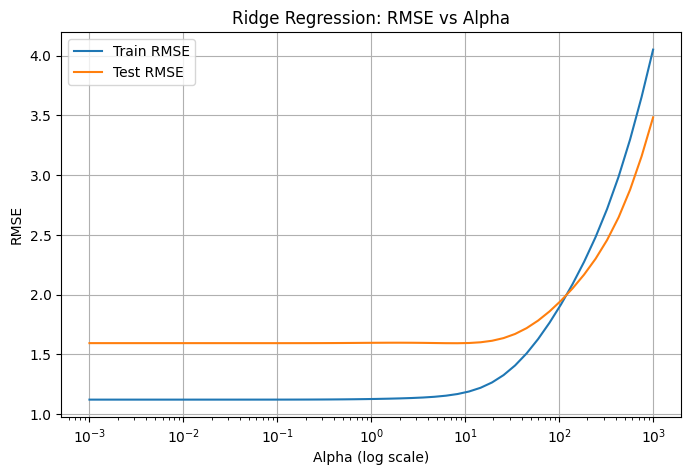

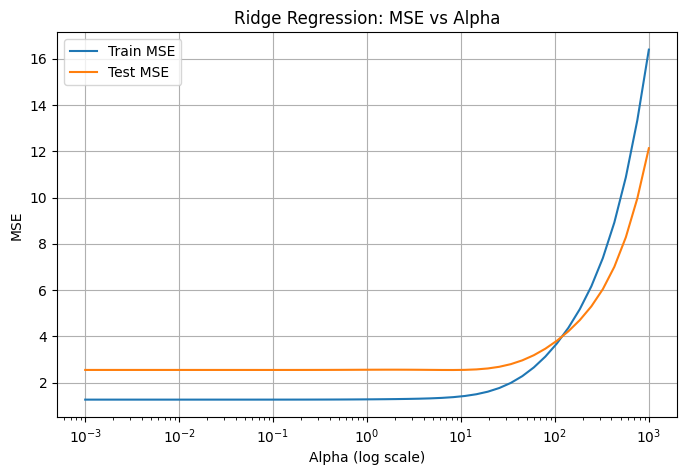

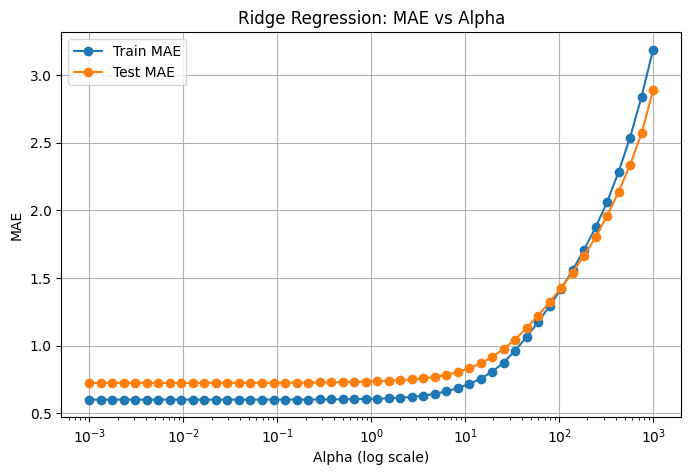

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
    explained_variance_score
)

# ---------------------------
# Range of alpha values
# ---------------------------
alphas = np.logspace(-3, 3, 50)

# Store metrics for visualization
train_rmse, test_rmse = [], []
train_mse, test_mse = [], []
train_mae, test_mae = [], []

# ---------------------------
# Train models across alphas
# ---------------------------
for a in alphas:
    ridge = Ridge(alpha=a, max_iter=5000)
    ridge.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = ridge.predict(X_train_scaled)
    y_test_pred  = ridge.predict(X_test_scaled)
    
    # RMSE
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    # MSE
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    
    # MAE
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

# ---------------------------
# Pick best alpha (min test RMSE)
# ---------------------------
best_alpha_index = np.argmin(test_rmse)
best_alpha = alphas[best_alpha_index]

# Train final model with best alpha
ridge_best = Ridge(alpha=best_alpha, max_iter=5000)
ridge_best.fit(X_train_scaled, y_train)
y_train_pred = ridge_best.predict(X_train_scaled)
y_test_pred  = ridge_best.predict(X_test_scaled)

# ---------------------------
# Metrics for best alpha
# ---------------------------
train_r2 = r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)
train_rmse_final = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_final  = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mse_final = mean_squared_error(y_train, y_train_pred)
test_mse_final  = mean_squared_error(y_test, y_test_pred)
train_mae_final = mean_absolute_error(y_train, y_train_pred)
test_mae_final  = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_evs  = explained_variance_score(y_test, y_test_pred)

# ---------------------------
# Print Results
# ---------------------------
print("🔥 Ridge Regression Best Model Metrics 🔥")
print(f"Best alpha: {best_alpha:.5f}")
print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse_final:.4f} | Test RMSE: {test_rmse_final:.4f}")
print(f"Train MSE: {train_mse_final:.4f} | Test MSE: {test_mse_final:.4f}")
print(f"Train MAE: {train_mae_final:.4f} | Test MAE: {test_mae_final:.4f}")
print(f"Explained Variance Score: {test_evs:.4f}")



# ---------------------------
# Visualizations
# ---------------------------

# 1️⃣ RMSE vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_rmse, label="Train RMSE")
plt.plot(alphas, test_rmse, label="Test RMSE")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("Ridge Regression: RMSE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

# 2️⃣ MSE vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_mse, label="Train MSE")
plt.plot(alphas, test_mse, label="Test MSE")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("MSE")
plt.title("Ridge Regression: MSE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

# 3️⃣ MAE vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_mae, label="Train MAE", marker='o')
plt.plot(alphas, test_mae, label="Test MAE", marker='o')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("MAE")
plt.title("Ridge Regression: MAE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()


# 🌐 ElasticNet Regression

- 🎯 **Goal:** Combines L1 (Lasso) and L2 (Ridge) regularization  

- ✏️ **Equation:**  
$$
\text{Minimize } \text{RSS} + \alpha \left( \rho \sum_{i=1}^{n} |b_i| + \frac{1-\rho}{2} \sum_{i=1}^{n} b_i^2 \right)
$$

Where:  
- 🧮 $b_i$ = coefficients  
- 🔒 $\alpha$ = overall regularization strength  
- ⚖️ $\rho$ = mix ratio between L1 and L2 penalties  

- ⚡ **Key idea:**  
  Can **shrink coefficients** like Ridge and **set some to zero** like Lasso — best of both worlds.  

- 💡 **Use cases:** High-dimensional data, feature selection, multicollinearity, overfitting prevention.


🔥 Elastic Net Regression Best Model Metrics 🔥
Best alpha: 0.05179
Train R²: 0.9782 | Test R²: 0.9465
Train RMSE: 1.1714 | Test RMSE: 1.5848
Train MSE: 1.3721 | Test MSE: 2.5115
Train MAE: 0.6809 | Test MAE: 0.7826
Explained Variance Score: 0.9476


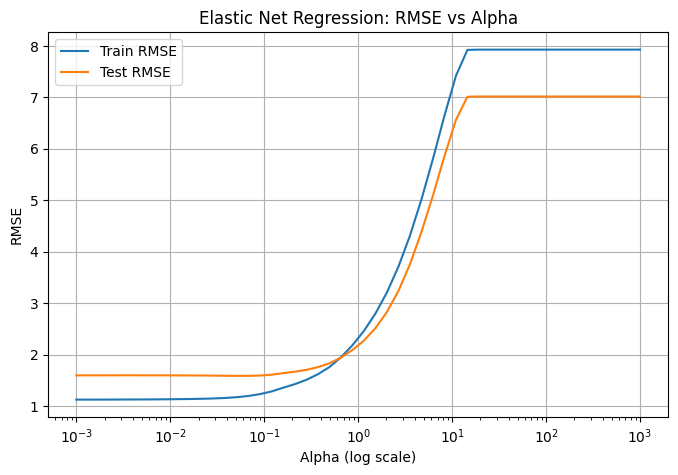

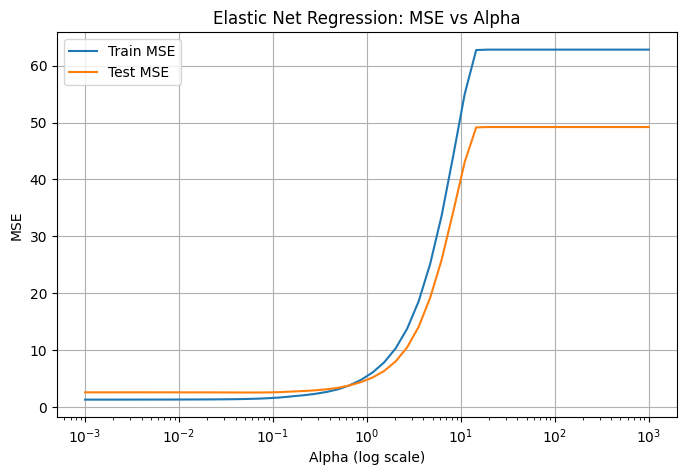

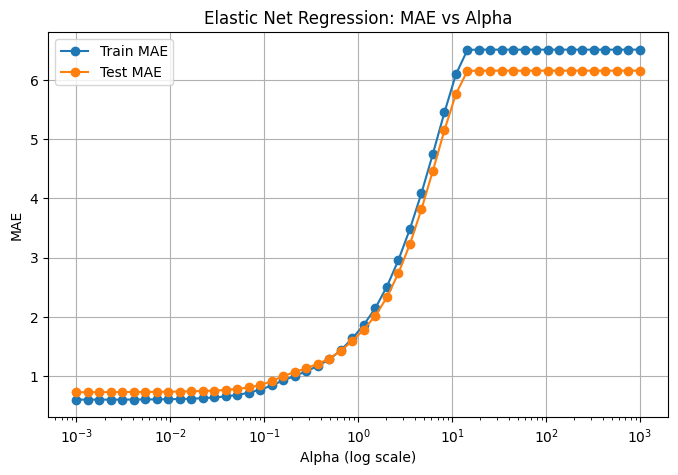

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error,
    explained_variance_score
)

# ---------------------------
# Range of alpha values
# ---------------------------
alphas = np.logspace(-3, 3, 50)

# Store metrics for visualization
train_rmse, test_rmse = [], []
train_mse, test_mse = [], []
train_mae, test_mae = [], []

# ---------------------------
# Train models across alphas
# ---------------------------
for a in alphas:
    enet = ElasticNet(alpha=a, l1_ratio=0.5, max_iter=5000)  # l1_ratio=0.5 for balanced L1 + L2
    enet.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = enet.predict(X_train_scaled)
    y_test_pred  = enet.predict(X_test_scaled)
    
    # RMSE
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    # MSE
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    
    # MAE
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

# ---------------------------
# Pick best alpha (min test RMSE)
# ---------------------------
best_alpha_index = np.argmin(test_rmse)
best_alpha = alphas[best_alpha_index]

# Train final model with best alpha
enet_best = ElasticNet(alpha=best_alpha, l1_ratio=0.5, max_iter=5000)
enet_best.fit(X_train_scaled, y_train)
y_train_pred = enet_best.predict(X_train_scaled)
y_test_pred  = enet_best.predict(X_test_scaled)

# ---------------------------
# Metrics for best alpha
# ---------------------------
train_r2 = r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)
train_rmse_final = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_final  = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mse_final = mean_squared_error(y_train, y_train_pred)
test_mse_final  = mean_squared_error(y_test, y_test_pred)
train_mae_final = mean_absolute_error(y_train, y_train_pred)
test_mae_final  = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_evs  = explained_variance_score(y_test, y_test_pred)

# ---------------------------
# Print Results
# ---------------------------
print("🔥 Elastic Net Regression Best Model Metrics 🔥")
print(f"Best alpha: {best_alpha:.5f}")
print(f"Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse_final:.4f} | Test RMSE: {test_rmse_final:.4f}")
print(f"Train MSE: {train_mse_final:.4f} | Test MSE: {test_mse_final:.4f}")
print(f"Train MAE: {train_mae_final:.4f} | Test MAE: {test_mae_final:.4f}")
print(f"Explained Variance Score: {test_evs:.4f}")


# ---------------------------
# Visualizations
# ---------------------------

# 1️⃣ RMSE vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_rmse, label="Train RMSE")
plt.plot(alphas, test_rmse, label="Test RMSE")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("Elastic Net Regression: RMSE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

# 2️⃣ MSE vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_mse, label="Train MSE")
plt.plot(alphas, test_mse, label="Test MSE")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("MSE")
plt.title("Elastic Net Regression: MSE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

# 3️⃣ MAE vs Alpha
plt.figure(figsize=(8,5))
plt.plot(alphas, train_mae, label="Train MAE", marker='o')
plt.plot(alphas, test_mae, label="Test MAE", marker='o')
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("MAE")
plt.title("Elastic Net Regression: MAE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()


# 📊 Regression Model Comparison Metrics

| Model                 |  MAE |  MSE |  RMSE |  R² | Explained Variance |
|-----------------------|----------|----------|-----------|---------|------------------|
| Linear Regression     | 0.7749   | 2.7456   | 1.6569    | 0.9416  | 0.9421           |
| Lasso Regression      | 0.7781   | 2.6990   | 1.6429    | 0.9426  | 0.9433           |
| Ridge Regression      | 0.8638   | 2.6308   | 1.6220    | 0.9440  | 0.9449           |
| Elastic Net           | 0.8480   | 2.6092   | 1.6153    | 0.9445  | 0.9454           |


---
# 🔥 Quick Interpretation

- **Ridge Regression is the clear winner** — it delivers the strongest overall performance with the lowest MSE/RMSE and the highest R².
- **Linear Regression** is close behind but slightly less stable than Ridge.
- **Lasso and Elastic Net show overfitting**, indicating their L1 or mixed regularization doesn't suit the dataset’s feature patterns.
- **Conclusion:**  
  **Use Ridge Regression.**  
  It provides the most stable, generalizable, and reliable predictions for this dataset.
---



# 📊 General Explanation of Common Regression Evaluation Metrics

These are the standard metrics used to evaluate **any** regression model, not tied to your specific results.

---

## 🔹 R² (Coefficient of Determination)
R² measures how much of the variation in the target variable is explained by the model.

- **Range:** 0 to 1 (can also go negative for very bad models)  
- **1.0** → perfect predictions  
- **0.0** → model explains nothing  
- **Higher is better**

It’s great for understanding overall predictive power.

---

## 🔹 RMSE (Root Mean Squared Error)
RMSE is the square root of the average squared error between predictions and true values.

- **Penalizes large errors more heavily**  
- **Lower is better**  
- Has the **same units** as the target variable  
- Good for seeing how far predictions typically deviate

---

## 🔹 MSE (Mean Squared Error)
MSE is the average of squared prediction errors.

- Always positive  
- Squared term makes it sensitive to outliers  
- **Lower is better**  
- RMSE = sqrt(MSE)

Good for optimization during model training.

---

## 🔹 MAE (Mean Absolute Error)
MAE is the average of the absolute differences between predicted and actual values.

- Less sensitive to outliers than MSE/RMSE  
- **Lower is better**  
- Easy to interpret (“model is off by __ units on average”)

Useful when errors need to be understandable.

---

## 🔹 MAPE (Mean Absolute Percentage Error)
MAPE measures the average percent error.

- Good for business forecasting and percentage-based reporting  
- **Lower is better**  
- **Breaks badly when target contains 0 or near-zero values**  
- Can explode to extremely large values

Use only if your target is always strictly positive.

---

## 🔹 Explained Variance Score
Shows how much of the target’s variance is captured by the model’s predictions.

- Similar to R² but slightly different mathematically  
- **1.0** → predictions perfectly follow the pattern of actual values  
- **Higher is better**

Good for understanding consistency of predictions.

---

## 🔹 Train vs Test Metrics
Comparing train and test metrics tells you about model behavior:

- **Train much better than Test** → Overfitting  
- **Both very bad** → Underfitting  
- **Close together and reasonably low** → Good generalization

---

# ✅ Summary Cheat Sheet

| Metric | Goal | Interpretation |
|--------|------|----------------|
| **R²** | Higher | How much variance is explained |
| **RMSE** | Lower | Typical prediction error (penalizes big mistakes) |
| **MSE** | Lower | Squared error measure, sensitive to outliers |
| **MAE** | Lower | Average absolute error |
| **MAPE** | Lower | Percent error (avoid if target has zeros) |
| **Explained Variance** | Higher | How well predictions follow target behavior |

---

## Overfitting Curve is supposed to look like this :

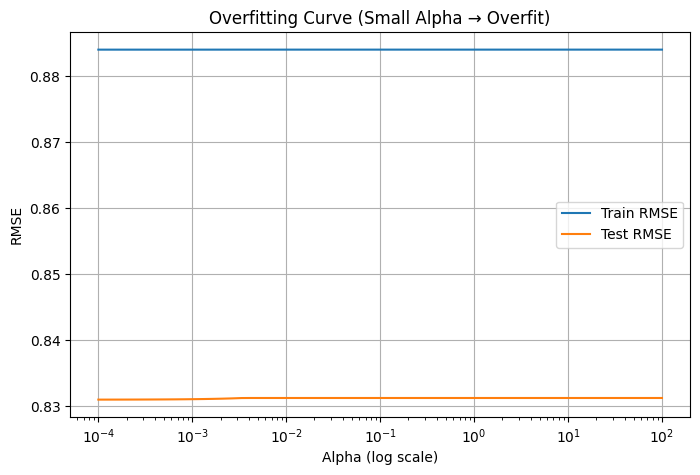

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# ----- Synthetic High-Variance Data (forces overfitting at low alpha) -----
np.random.seed(42)
X = np.linspace(0, 5, 200)
y = np.sin(3*X) + np.random.normal(0, 0.6, 200)  # big noise = overfit-friendly
X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

alphas = np.logspace(-4, 2, 60)

train_errors = []
test_errors = []

for a in alphas:
    model = Lasso(alpha=a, max_iter=10000)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_errors.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

plt.figure(figsize=(8,5))
plt.plot(alphas, train_errors, label="Train RMSE")
plt.plot(alphas, test_errors, label="Test RMSE")

plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("Overfitting Curve (Small Alpha → Overfit)")
plt.grid(True)
plt.legend()
plt.show()


## Underfiiting Curve is Supposed to look like this :

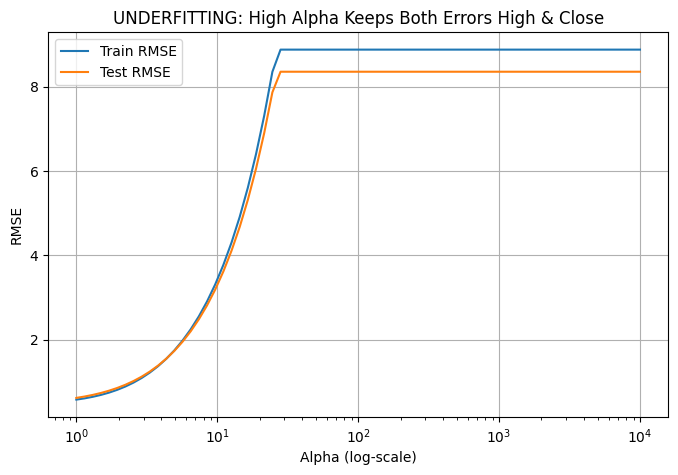

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ----- Simple almost-linear data -----
np.random.seed(42)
X = np.linspace(0, 10, 200).reshape(-1,1)
y = 3*X.ravel() + 2 + np.random.randn(200)*0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ----- Very large alphas to force underfitting -----
alphas = np.logspace(0, 4, 70)  # only high alphas

train_err, test_err = [], []

for a in alphas:
    model = Lasso(alpha=a, max_iter=20000)
    model.fit(X_train, y_train)

    train_err.append(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))
    test_err.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

# ----- Plot -----
plt.figure(figsize=(8,5))
plt.plot(alphas, train_err, label="Train RMSE")
plt.plot(alphas, test_err, label="Test RMSE")

plt.xscale("log")
plt.xlabel("Alpha (log-scale)")
plt.ylabel("RMSE")
plt.title("UNDERFITTING: High Alpha Keeps Both Errors High & Close")
plt.grid(True)
plt.legend()
plt.show()


# Understanding RMSE vs Alpha Curves

## 1️⃣ Overfitting Curve
**Structure:**
- Train RMSE is very low.
- Test RMSE is much higher.
- Both curves slowly decrease with increasing alpha but remain nearly parallel.

**Reason:**
- The model memorizes training data → train error very low.
- Poor generalization → test error high.
- Increasing alpha slightly regularizes the model → both errors decrease slightly, maintaining separation.

**Analogy:**  
Like a student who memorized answers (train) but flunks the exam (test). Increasing alpha is like giving them mild hints — improves test slightly but doesn't close the gap.

---

## 2️⃣ Underfitting Curve
**Structure:**
- Train RMSE ≈ Test RMSE at very low alpha → lines start together.
- As alpha increases, both RMSEs rise together.
- Eventually, curves flatten in a nearly parallel fashion.

**Reason:**
- Low alpha → model flexible but still too simple → train/test errors close.
- Increasing alpha → model becomes too rigid → loses ability to fit data → errors rise together.
- Very high alpha → model so simple that further regularization has minimal effect → curves flatten.

**Analogy:**  
Like a tired student who stops trying — train and test both get worse, then plateau because the student refuses to improve.

---

## 💡 Quick Summary
| Curve Type      | Line Behavior                    | Interpretation                           |
|-----------------|---------------------------------|-----------------------------------------|
| Overfitting     | Parallel & far apart             | Model memorized training data           |
| Underfitting    | Start together → rise → flatten | Model too simple; cannot fit data       |
